In [1]:
!pip install networkx matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 무방향 그래프 생성 및 시각화

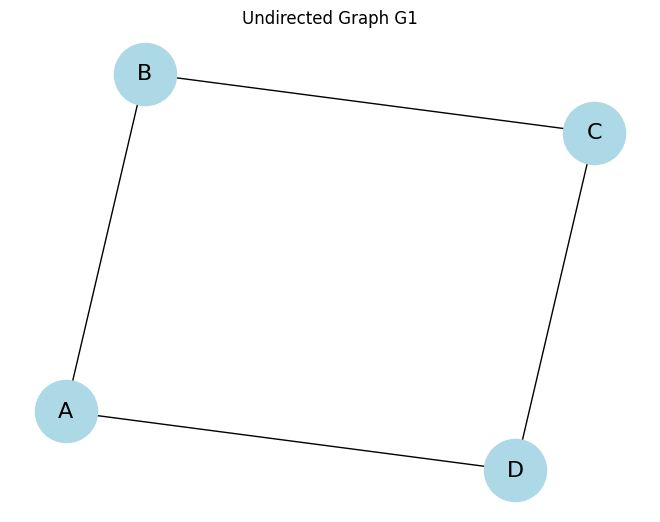

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 정점과 간선 정의
V = {"A", "B", "C", "D"}
E = {("A", "B"), ("A", "D"), ("B", "C"), ("C", "D")}

# 그래프 생성
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

# 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16)
plt.title("Undirected Graph G1")
plt.show()


### 방향 그래프 생성 및 시각화

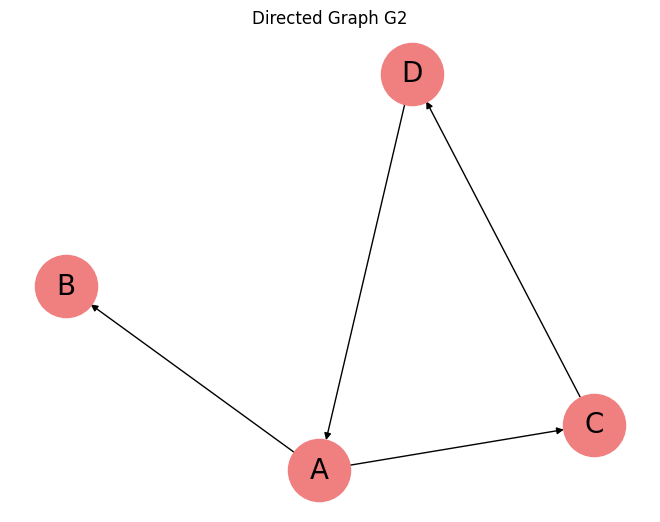

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# 정점과 간선 정의
V = {"A", "B", "C", "D"}
E = {("A", "C"), ("A", "B"), ("C", "D"), ("D", "A")}

# 방향 그래프 생성
G = nx.DiGraph()  # 방향 있는 그래프
G.add_nodes_from(V)
G.add_edges_from(E)

# 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=2000, font_size=20)
plt.title("Directed Graph G2")
plt.show()


### 가중치가 있는 무방향 그래프

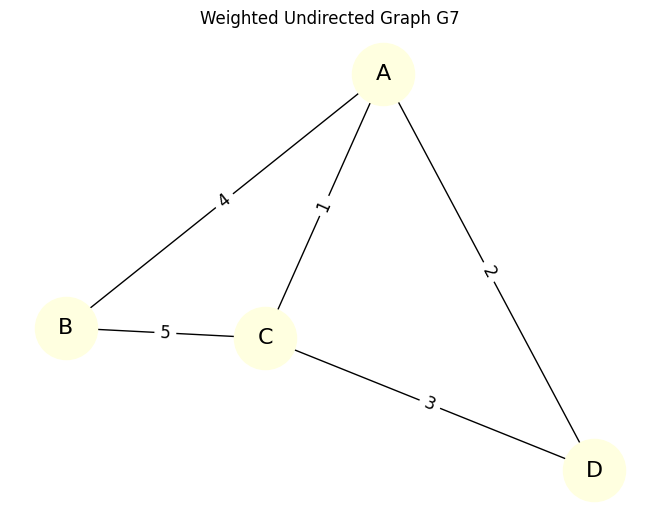

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 가중치 있는 간선 정의
edges_with_weights = [
    ("A", "B", 4),
    ("B", "C", 5),
    ("C", "D", 3),
    ("A", "D", 2),
    ("A", "C", 1)
]

# 그래프 생성
G = nx.Graph()
G.add_weighted_edges_from(edges_with_weights)

# 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=2000, font_size=16)

# 간선 위에 가중치(label) 표시
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

plt.title("Weighted Undirected Graph G7")
plt.show()


### 연결되지 않은 그래프 + 연결 여부 확인

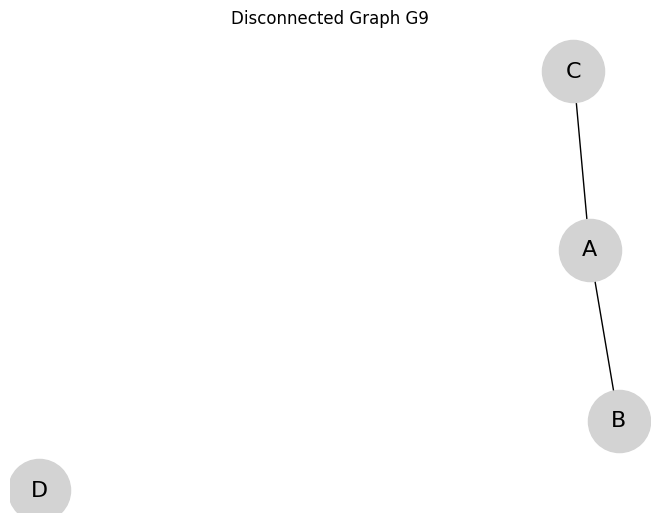

그래프가 연결되어 있는가? False


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 정점 및 간선 정의
V = {"A", "B", "C", "D"}  # D는 연결 없음
E = {("A", "B"), ("A", "C")}  # D는 간선 없음

# 그래프 생성
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

# 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=2000, font_size=16)
plt.title("Disconnected Graph G9")
plt.show()

# 연결 여부 확인 (보너스)
print("그래프가 연결되어 있는가?", nx.is_connected(G))


### 사이클이 있는 그래프 + 사이클 탐지

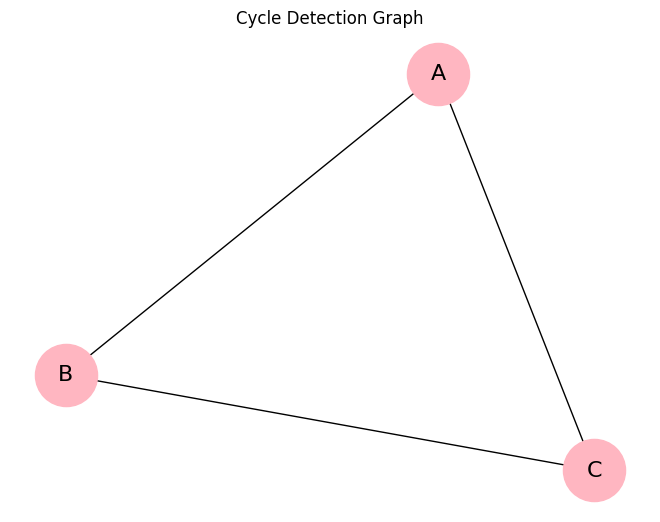

🔁 사이클이 존재합니다: [('A', 'B'), ('B', 'C'), ('C', 'A')]


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 간선 정의 (사이클 포함)
edges = [("A", "B"), ("B", "C"), ("C", "A")]

# 그래프 생성
G = nx.Graph()
G.add_edges_from(edges)

# 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightpink', node_size=2000, font_size=16)
plt.title("Cycle Detection Graph")
plt.show()

# 사이클 유무 확인 (보너스)
try:
    cycle = nx.find_cycle(G)
    print("🔁 사이클이 존재합니다:", cycle)
except nx.exception.NetworkXNoCycle:
    print("✅ 사이클이 존재하지 않습니다.")


가중치 그래프에서 최단 경로 찾기

In [7]:
# 역과 연결 구간 정의 (출발역, 도착역, 소요시간)
edges_with_weights = [
    ("A", "B", 4),  # A역에서 B역까지 4분
    ("A", "C", 2),  # A역에서 C역까지 2분
    ("B", "D", 5),  # B역에서 D역까지 5분
    ("C", "D", 1),  # C역에서 D역까지 1분
    ("C", "E", 3),  # C역에서 E역까지 3분
    ("D", "E", 2)   # D역에서 E역까지 2분
]

import networkx as nx

# 무방향 그래프 생성
G = nx.Graph()
G.add_weighted_edges_from(edges_with_weights)

# A역에서 E역까지 최단 경로 구하기
shortest_path = nx.shortest_path(G, source="A", target="E", weight="weight")
print("📌 최단 경로:", shortest_path)

# 총 소요 시간 계산
shortest_time = nx.shortest_path_length(G, source="A", target="E", weight="weight")
print("⏱ 총 소요 시간:", shortest_time, "분")


📌 최단 경로: ['A', 'C', 'E']
⏱ 총 소요 시간: 5 분
